# Yacine Mahdid May 24 2020
In this notebook the goal is to augment the analysis by using power, peak-frequencies and wpli feature at all bandpass of interest. This analysis has four steps:
1. [x] Use LOSO+Model selection to find the average accuracies for both healthy and MSK with all features
2. [X] Find which model is the best one using all the params and get these parameters
3. [X] Train the final model on the best parameters (This doesn't have to be automated)
4. [X] Visualize the feature weights with corresponding labels as a barplot

## Features in this analysis
The feature listed belows are for all the 19 channels
- Power, peak frequency and average wPLI at Delta (0.5 - 4Hz)
- Power, peak frequency and average wPLI at Theta (4 - 8Hz)
- Power, peak frequency and average wPLI at Alpha (8 - 14Hz)
- Power, peak frequency and average wPLI at Beta (14 - 32Hz)




## Classifier In Gridsearch
- Linear SVM
- Linear Regression
- Decision Trees

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from ml_tools.classification import classify_loso_model_selection
from ml_tools.classification import classify_loso
from ml_tools.classification import create_gridsearch_pipeline
from ml_tools.pre_processing import pre_process

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

def plot_acc(group, accuracies, participant_type):
    # Plot of Each Participant Accuracies in the Cross Validation Scheme
    p_id = np.unique(group)
    sns.barplot(x=p_id, y=accuracies, palette="deep").set_title(f"Accuracy for each participant in {participant_type}")
    plt.show()

def find_best_model(best_params):
    models_occurence = {}
    for param in best_params:
        clf = param['clf']
        if isinstance(clf, LogisticRegression):
            key = "LOG" + "_penality=" + str(clf.penalty) + "_C=" + str(clf.C)
        elif isinstance(clf, SVC):
            key = "SVC" + "_kernel=linear_C=" + str(clf.C)
        elif isinstance(clf, DecisionTreeClassifier):
            key = "DEC" + "_criterion" + str(clf.criterion)

        if key not in models_occurence:
            models_occurence[key] = 1
        else:
            models_occurence[key] = models_occurence[key] + 1

    return models_occurence
# Global Experimental Variable
input_filename = '/media/yacine/Data/pain_and_eeg/machine_learning_data/features_litterature.csv'

Number of folds left: 12


/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Number of folds left: 11


/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Number of folds left: 10


/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Number of folds left: 9


/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Number of folds left: 8


/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Number of folds left: 7


/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Number of folds left: 6


/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Number of folds left: 5


/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Number of folds left: 4


/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Number of folds left: 3


/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Number of folds left: 2


/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Number of folds left: 1


/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Accuracies:  [0.6818181818181818, 1.0, 0.5555555555555556, 0.5238095238095238, 0.7916666666666666, 0.6956521739130435, 0.75, 0.5, 0.43478260869565216, 0.6818181818181818, 0.8260869565217391, 0.75]


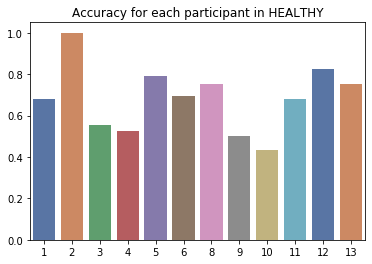

Mean Accuracies: 0.6825991540665454


,id,type,is_hot,fp1_delta_power,fp2_delta_power,fz_delta_power,f3_delta_power,f4_delta_power,f7_delta_power,f8_delta_power,...,c4_beta_wpli,t3_beta_wpli,t4_beta_wpli,t5_beta_wpli,t6_beta_wpli,pz_beta_wpli,p3_beta_wpli,p4_beta_wpli,o1_beta_wpli,o2_beta_wpli
0,1,1,0,22.899,21.685,19.915,20.237,19.067,25.607,22.783,...,0.039848,NaN,NaN,0.002726,0.004716,0.006419,0.010346,0.005655,0.021648,0.009814
1,1,1,0,18.045,19.316,16.737,16.287,18.159,23.842,23.258,...,0.000000,NaN,NaN,0.006518,0.008076,0.005157,0.005912,0.009559,0.010494,0.013897
2,1,1,0,24.716,20.559,20.137,20.502,18.873,27.437,23.170,...,0.085168,NaN,NaN,0.021592,0.014717,0.029861,0.018823,0.021594,0.018645,0.014998
3,1,1,0,22.554,19.396,18.931,19.895,17.095,25.061,21.846,...,0.065796,NaN,NaN,0.008525,0.019107,0.007764,0.015277,0.013456,0.032267,0.007144
4,1,1,0,20.109,19.079,17.726,18.734,16.019,21.981,20.454,...,0.038918,NaN,NaN,0.091696,0.035354,0.032495,0.039161,0.038287,0.079835,0.018044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,13,1,1,21.233,26.780,16.821,15.673,18.676,25.178,27.625,...,0.059408,0.041181,0.034475,0.040767,0.044434,0.050616,0.025025,0.060432,0.020502,0.030932
234,13,1,1,18.163,23.708,15.590,14.989,19.528,23.212,27.909,...,0.022384,0.008363,0.059376,0.005833,0.047576,0.033577,0.018275,0.041769,0.013826,0.019184
235,13,1,1,20.138,25.910,17.005,14.137,18.955,21.219,28.452,...,0.025809,0.021943,0.000000,0.012655,0.045346,0.039628,0.014923,0.011943,0.024625,0.035348
236,13,1,1,18.651,23.389,16.885,15.653,17.607,25.356,28.274,...,0.022644,0.019759,0.061607,0.030835,0.016450,0.014307,0.008466,0.010588,0.010393,0.030519


In [3]:
# Experiment with Healthy
participant_type = "HEALTHY" #HEALTHY, MSK or BOTH

gs = create_gridsearch_pipeline()
X,y,group,df = pre_process(input_filename, participant_type)
accuracies, best_params = classify_loso_model_selection(X, y, group, gs)

print("Accuracies: ", str(accuracies))
plot_acc(group, accuracies, participant_type)
print("Mean Accuracies: " + str(np.mean(accuracies)))
df

/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

Accuracies:  [0.6666666666666666, 0.4166666666666667, 0.6923076923076923, 0.9444444444444444, 0.5294117647058824, 0.7272727272727273, 0.7142857142857143, 0.55, 0.8181818181818182, 0.68, 0.5384615384615384, 0.6470588235294118, 0.6153846153846154, 0.8636363636363636, 0.65, 0.6842105263157895, 0.8888888888888888, 0.5, 0.43478260869565216, 0.8, 0.5, 0.8421052631578947, 0.95, 0.92, 0.6896551724137931, 0.7222222222222222, 0.9523809523809523, 0.6666666666666666, 0.3333333333333333, 0.8, 0.5238095238095238, 0.6, 0.6111111111111112, 0.6744186046511628, 0.6363636363636364, 0.8095238095238095, 0.7, 0.4444444444444444, 0.6363636363636364, 0.36666666666666664, 0.7083333333333334, 0.7058823529411765, 0.7307692307692307, 0.4117647058823529, 0.875, 0.5625, 0.9230769230769231, 0.47058823529411764, 0.5384615384615384, 0.4117647058823529, 0.375, 0.625, 0.7692307692307693]


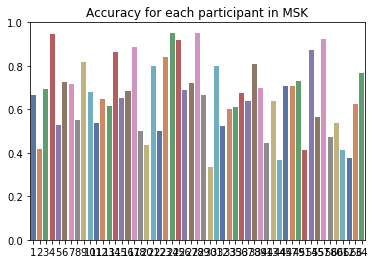

Mean Accuracies: 0.6575112773098967


In [6]:
# Notes:
# The MSK participants are very long to run since there are a lots of participants
# We will pause this and go with the Healthy participant for now
participant_type = "MSK" #HEALTHY, MSK or BOTH

gs = create_gridsearch_pipeline()
X,y,group,df = pre_process(input_filename, participant_type)
clf = LogisticRegression(penalty="l1", C=2.7825594022071245)
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', clf)])
accuracies = classify_loso(X, y, group, pipe)
#accuracies, best_params = classify_loso_model_selection(X, y, group, gs)

print("Accuracies: ", str(accuracies))
plot_acc(group, accuracies, participant_type)
print("Mean Accuracies: " + str(np.mean(accuracies)))

In [10]:
# Find te best model by looking at the occurence of the model parameters
model_occurence = find_best_model(best_params)
model_occurence

{'LOG_penality=l2_C=2.7825594022071245': 11, 'SVC_kernel=linear_C=1000': 1}

/home/yacine/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


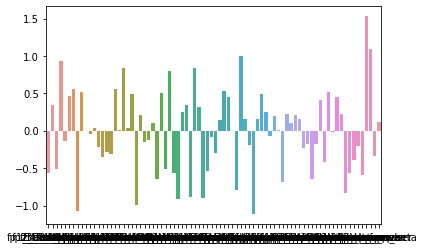

In [12]:
# Once we know the model occurence we can train the best model on the full dataset
clf = LogisticRegression(penalty="l1", C=2.7825594022071245)
pipe = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', StandardScaler()),
    ('clf', clf)])
pipe.fit(X, y)
clf = pipe.steps[2][1]
feature_weights = clf.coef_[0]


feature_df = df.drop(['id', 'type', 'is_hot'], axis=1)
feature_names = list(feature_df.columns.values)

ax = sns.barplot(x=feature_names, y=feature_weights)
plt.show()

# Here there might be some cool visualization we cool do by looking only at a per bandpass basis
# or grouping the bandpass together to have four bar

In [15]:
19*4

76